In [1]:
import pandas as pd
# from dataprep.datasets import load_dataset
# from dataprep.eda import create_report

df=pd.read_csv("train_titanic.csv")
# create_report(df).show()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Ensambling
Agregare resultados de diferentes algoritmos o distintas instacias del mismo algoritmo, para obtener una mejor prediccion

# 1) Voting
# 2) Stacking
# 3) Bagging
# 4) Boosting

# Voting

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)

In [4]:
y=np.where(y==2,1,0)
#transformamos el problema en binario

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y
)

In [5]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = SVC(probability=True)
model3=RandomForestClassifier()

In [6]:
model3

RandomForestClassifier()

In [7]:
voting_model = VotingClassifier(
    estimators=[("Logística", model1),
                ("SV Machine", model2),
                ("RandomForest", model3)],
    voting="soft")

voting_model = voting_model.fit(X_train,y_train)

In [8]:
voting_model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [9]:
voting_model.get_params()

{'estimators': [('Logística', LogisticRegression()),
  ('SV Machine', SVC(probability=True)),
  ('RandomForest', RandomForestClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'Logística': LogisticRegression(),
 'SV Machine': SVC(probability=True),
 'RandomForest': RandomForestClassifier(),
 'Logística__C': 1.0,
 'Logística__class_weight': None,
 'Logística__dual': False,
 'Logística__fit_intercept': True,
 'Logística__intercept_scaling': 1,
 'Logística__l1_ratio': None,
 'Logística__max_iter': 100,
 'Logística__multi_class': 'auto',
 'Logística__n_jobs': None,
 'Logística__penalty': 'l2',
 'Logística__random_state': None,
 'Logística__solver': 'lbfgs',
 'Logística__tol': 0.0001,
 'Logística__verbose': 0,
 'Logística__warm_start': False,
 'SV Machine__C': 1.0,
 'SV Machine__break_ties': False,
 'SV Machine__cache_size': 200,
 'SV Machine__class_weight': None,
 'SV Machine__coef0': 0.0,
 'SV Machine__decision_function_sh

In [10]:
yhat_test = voting_model.predict(X_test)
print("Acuracy:", accuracy_score(y_test,yhat_test))

Acuracy: 0.9473684210526315


In [11]:
voting_model.predict_proba(X_test)
# probbilidad entre la mas alta de las dos colums, de ahi saca los 1 y 0

array([[2.31796307e-01, 7.68203693e-01],
       [3.05841667e-01, 6.94158333e-01],
       [9.99725796e-01, 2.74203638e-04],
       [9.99638224e-01, 3.61775819e-04],
       [9.99533400e-01, 4.66600122e-04],
       [1.01507130e-02, 9.89849287e-01],
       [1.63243392e-02, 9.83675661e-01],
       [9.19595701e-01, 8.04042986e-02],
       [8.13814683e-01, 1.86185317e-01],
       [9.58572873e-01, 4.14271272e-02],
       [9.98960281e-01, 1.03971935e-03],
       [6.95011330e-01, 3.04988670e-01],
       [9.99739190e-01, 2.60809848e-04],
       [9.12022254e-01, 8.79777457e-02],
       [9.80806836e-01, 1.91931641e-02],
       [9.99698988e-01, 3.01011928e-04],
       [5.95536820e-03, 9.94044632e-01],
       [9.99683000e-01, 3.16999673e-04],
       [1.17525900e-02, 9.88247410e-01],
       [9.99788134e-01, 2.11865864e-04],
       [8.89052227e-01, 1.10947773e-01],
       [9.99740513e-01, 2.59487091e-04],
       [9.79552917e-01, 2.04470830e-02],
       [9.39141201e-01, 6.08587988e-02],
       [5.049962

# Stacking

In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [13]:
model1=RandomForestClassifier(n_estimators=10, random_state=42)
model2=make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))

In [14]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [15]:
yhat1=model1.predict_proba(X_train)[:,1]
yhat2=model2.predict_proba(X_train)[:,1]

In [16]:
Y_predichas=pd.DataFrame({'yhat1':yhat1,'yhat2':yhat2})

In [17]:
final_estimator=LogisticRegression()
final_estimator.fit(Y_predichas, y_train)

LogisticRegression()

In [18]:
estimators = [("rf", model1), ("svr", model2)]

In [19]:
clf = StackingClassifier(estimators=estimators,
                         final_estimator=LogisticRegression()
                         )

In [20]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9473684210526315

In [21]:
clf.final_estimator_.coef_

array([[1.94577867, 3.29584723]])

In [22]:
clf.final_estimator_.intercept_

array([-2.87123224])

# Bagging

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor

X = pd.read_csv("solubility_train.csv")

In [24]:
y = X['Solubility']
X = X.drop(columns=['Unnamed: 0','Solubility'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
X

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
0,0,1,0,0,1,0,0,1,0,0,...,4.177811,0.584815,0.000000,0.000,0.000,0.000000,1.386294,-1.606542,6.812456,6.812456
1,0,1,0,1,1,1,1,1,0,0,...,5.092358,0.642355,0.693147,0.375,0.000,0.000000,1.609438,-0.441330,9.753834,12.029604
2,1,1,1,1,1,0,0,1,0,1,...,4.023944,0.000000,1.098612,0.000,0.000,0.000000,0.693147,-0.384859,8.245324,8.245324
3,0,0,1,0,0,0,1,0,0,0,...,3.510455,0.000000,0.000000,0.000,0.000,0.000000,0.693147,-2.373472,0.000000,0.000000
4,0,0,1,1,1,1,0,0,1,0,...,3.317541,0.694335,0.000000,0.000,0.375,0.375000,0.693147,-0.070987,9.913535,9.913535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,1,0,1,1,0,1,0,0,0,0,...,2.372566,0.584815,1.098612,0.000,0.000,0.000000,0.693147,0.713897,10.916599,10.916599
947,0,1,0,0,1,1,0,0,0,0,...,2.886887,0.456826,0.000000,0.000,0.000,0.000000,0.693147,-0.169051,4.481002,4.481002
948,1,0,1,1,0,0,1,0,0,0,...,2.886887,0.000000,0.693147,0.000,0.000,0.000000,0.000000,-1.483783,5.456522,5.456522
949,0,0,0,0,0,0,0,0,1,0,...,1.301297,0.000000,0.000000,0.000,0.000,0.444444,0.000000,-0.533242,0.000000,0.000000


In [26]:
y

0     -3.97
1     -3.98
2     -3.99
3     -4.00
4     -4.06
       ... 
946   -1.26
947   -1.28
948   -1.30
949   -1.32
950   -1.34
Name: Solubility, Length: 951, dtype: float64

* creo un bagging (buscar los emejores hiperparámetros de un modelo bagging)

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

bagging = BaggingRegressor(estimator=KNeighborsRegressor(5), n_estimators=10, max_samples=0.5, max_features=0.5)

In [28]:
bagging.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [30]:
params={'base_estimator__n_neighbors': [5, 10],  # Parámetros del estimador base
    'n_estimators': [10, 20]  # Parámetros del modelo BaggingRegressor
}
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# creamos la GridSeacrh
grid_solver_knn = GridSearchCV(estimator = bagging, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'neg_mean_squared_error',
                   verbose = 1)
grid_solver_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=KNeighborsRegressor(),
                                        max_features=0.5, max_samples=0.5),
             param_grid={'base_estimator__n_neighbors': [5, 10],
                         'n_estimators': [10, 20]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'explained_variance', 'r2'],
             verbose=1)

In [31]:
y_hat=grid_solver_knn.predict(X_train)
print("MSE KNN:", mean_squared_error(y_train,y_hat))
print("r2 score KNN:", r2_score(y_train,y_hat))

MSE KNN: 0.7343327787134502
r2 score KNN: 0.8217792911851884


# Bagged Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

bagging_trees = BaggingRegressor(DecisionTreeRegressor(), n_estimators=20, max_samples=0.5, max_features=0.5)
bagging_trees.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
params={ 'estimator__max_depth': [5],
        'estimator__max_features': [0.3,0.5],
 'n_estimators': [20]}
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# creamos la GridSeacrh
grid_solver_trees = GridSearchCV(estimator = bagging_trees, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'neg_mean_squared_error',
                   verbose = 1)
grid_solver_trees.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        max_features=0.5, max_samples=0.5,
                                        n_estimators=20),
             param_grid={'estimator__max_depth': [5],
                         'estimator__max_features': [0.3, 0.5],
                         'n_estimators': [20]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'explained_variance', 'r2'],
             verbose=1)

In [34]:
y_hat=grid_solver_trees.predict(X_train)
print("Train:        MSE Bagged Trees:", mean_squared_error(y_train,y_hat))
print("Train:   r2 score Bagged Trees:", r2_score(y_train,y_hat))

Train:        MSE Bagged Trees: 0.5300429771403632
Train:   r2 score Bagged Trees: 0.871359909530703


In [35]:
y_hat=grid_solver_trees.predict(X_test)
print("Test:        MSE Bagged Trees:", mean_squared_error(y_test,y_hat))
print("Test:   r2 score Bagged Trees:", r2_score(y_test,y_hat))

Test:        MSE Bagged Trees: 0.8280915284264644
Test:   r2 score Bagged Trees: 0.8234322789326032


In [36]:
n_cv=3
model = RandomForestRegressor()
params={'criterion':['squared_error'],
        'max_depth': [5,7],# Maxima pofundidad del arbol
        'max_features': [0.3, 0.7], # numero de features a considerar en cada split
        'max_samples' : [0.8,0.5],
        'max_leaf_nodes': [10,30], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [5,10], # The minimum number of samples required to split an internal node:
        'n_estimators': [100] # numero de arboles
        }
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']


# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'neg_mean_squared_error',
                           verbose = 1) # cuanto va a imprimir por pantalla
# entrenamos
model_result = grid_solver.fit(X,y)
model_result.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


RandomForestRegressor(max_depth=7, max_features=0.7, max_leaf_nodes=30,
                      max_samples=0.5, min_impurity_decrease=0.05,
                      min_samples_split=5)

# Boosting

1) Adaboost: Itera y busca los errores y ajusta los pesos para reducir el error. La optimización sigue hasta que obtiene un predictor fuerte.

2) Gradient Boosting (GB): Usa el descenso del gradeinte. Añade, predcitores de forma seceuncial, donde cada uno corrige los errores del anterior. (No cambia pesos de las muestras)

3) XGB (Extreme Gradient Boosting): Variación del GB que usa múltiples cores de entrenamiento en paralelo. (Además introduce "regularización")

In [37]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:  ', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set:   (45, 4) (45,)


## Adaboost

In [39]:
clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.1)

clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, yhat))

accuracy 0.9777777777777777


In [40]:
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 10,
 'random_state': None}

## Gradient Boosting

In [41]:
clf2 = GradientBoostingClassifier(learning_rate=0.05,
                                  n_estimators=100,
                                  tol=0.0001, #parametros propios del boosting, a partir de aquí del arbol
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=3,
                                  random_state=None,
                                  max_features=None)
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat2))

Accuracy:  0.9777777777777777


## XGB

In [52]:
X = pd.read_csv("solubility_train.csv")
y = X['Solubility']
X = X.drop(columns=['Unnamed: 0','Solubility'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [53]:
import xgboost as xgb
from xgboost import XGBRegressor

xgbmodel = XGBRegressor()
xgbmodel.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [54]:
params={'base_score': [0.5], # prediccion inicial
     'booster': ['gbtree'], # (gbtree, gblinear, dart)
     'colsample_bylevel': [1], # ratio de columnas en cada nivel
     'colsample_bytree': [0.7], # ratio de columnas por tree
     'gamma': [0.01],    # minimo "loss" reduccion para crear un nuevo split. Larger-> conservative
     'learning_rate': [0.1], # (eta) aportacion de cada arbol al modelo
     'max_depth': [3], # maxima profundidad en cada arbol
     'min_child_weight': [1], # minimo numero samples por hoja
    #'missing': [1], # si queremos reemplazar los missings por un numero
     'n_estimators': [100,150,200,250,300,350,400], # numero de arboles
     'n_jobs': [-1], # trabajos en paralelo
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.1], # L1 regularitacion
     'reg_lambda': [0.01,0.1], # L2 regularitacion
     'scale_pos_weight': [1],
     'subsample': [0.9]} # ratio de muestras por cada arbol

In [55]:
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']
grid_solver = GridSearchCV(estimator = xgbmodel, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit='neg_mean_squared_error',
                   verbose = 2)

model_result_xgboost = grid_solver.fit(X_train,y_train)
model_result_xgboost.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.7,
 'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 400,
 'n_jobs': -1,
 'random_state': 0,
 'reg_alpha': 0.1,
 'reg_lambda': 0.01,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [56]:
y_pred=model_result_xgboost.predict(X_train)
print("MSE train:", mean_squared_error(y_train,y_pred))
y_pred=model_result_xgboost.predict(X_test)
print("MSE test: ", mean_squared_error(y_test,y_pred))

MSE train: 0.04527381449732963
MSE test:  0.35975233968622033


In [57]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3,
                         learning_rate=0.1, early_stopping_rounds=20)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:1.90912	validation_1-rmse:1.88273
[1]	validation_0-rmse:1.78080	validation_1-rmse:1.73339
[2]	validation_0-rmse:1.66881	validation_1-rmse:1.62126
[3]	validation_0-rmse:1.56794	validation_1-rmse:1.50661
[4]	validation_0-rmse:1.47810	validation_1-rmse:1.41850
[5]	validation_0-rmse:1.39508	validation_1-rmse:1.32671
[6]	validation_0-rmse:1.32092	validation_1-rmse:1.25263
[7]	validation_0-rmse:1.25858	validation_1-rmse:1.18218
[8]	validation_0-rmse:1.20209	validation_1-rmse:1.13229
[9]	validation_0-rmse:1.15010	validation_1-rmse:1.07560
[10]	validation_0-rmse:1.10154	validation_1-rmse:1.03564
[11]	validation_0-rmse:1.05965	validation_1-rmse:1.00503
[12]	validation_0-rmse:1.02268	validation_1-rmse:0.96913
[13]	validation_0-rmse:0.98683	validation_1-rmse:0.94146
[14]	validation_0-rmse:0.95758	validation_1-rmse:0.91832
[15]	validation_0-rmse:0.92984	validation_1-rmse:0.88894
[16]	validation_0-rmse:0.90492	validation_1-rmse:0.86255
[17]	validation_0-rmse:0.87964	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

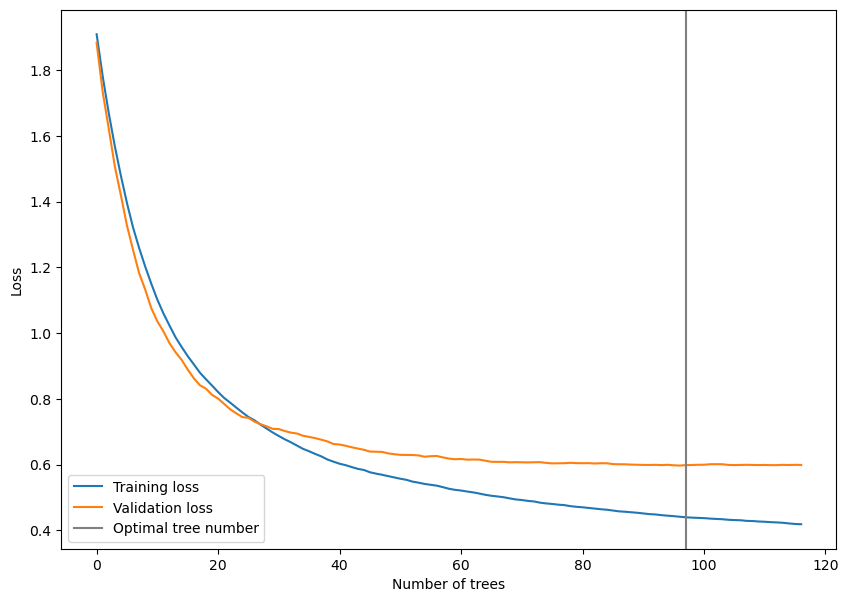

In [58]:
results = model.evals_result()

total_trees=len(results["validation_0"]["rmse"]) #el numero total de arboles

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(total_trees-20, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()